# Datacube(NASA POWER Climate Data) to GeoCroissant Conversion Workflow, Metadata Generation

This notebook demonstrates the conversion of NASA POWER climate datacube (Xarray Dataset) to GeoCroissant metadata format for standardized data discovery and FAIR data principles.

<img src="../asset/GeoCroissant.jpg" alt="GeoCroissant" width="150" style="float: right; margin-left: 50px;">

## Overview
- **Data Source**: NASA POWER MERRA2 temporal dataset
- **Format**: Zarr datacube stored on AWS S3
- **Variables**: Temperature at 2 Meters (T2M) and other climate variables
- **Coverage**: Global, monthly temporal resolution
- **Output**: GeoCroissant JSON-LD metadata for data cataloging

## Loading NASA POWER Dataset with Xarray

This cell demonstrates how to load the NASA POWER Zarr dataset using Xarray.

In [1]:
import xarray as xr

store = "https://nasa-power.s3.us-west-2.amazonaws.com/merra2/temporal/power_merra2_monthly_temporal_utc.zarr/"
ds = xr.open_zarr(store)

ds

/home/zeus/miniconda3/envs/cloudspace/lib/python3.12/site-packages/numcodecs/__init__.py:106: DeprecationWarning: crc32c usage is deprecated since numcodecs v0.16.4. It is recommended to install google_crc32c instead.
  from numcodecs.checksum32 import CRC32, Adler32, JenkinsLookup3


<xarray.Dataset> Size: 231GB
Dimensions:          (time: 588, lat: 361, lon: 576)
Coordinates:
  * time             (time) datetime64[ns] 5kB 1981-01-31 ... 2029-12-31
  * lat              (lat) float64 3kB -90.0 -89.5 -89.0 ... 89.0 89.5 90.0
  * lon              (lon) float64 5kB -180.0 -179.4 -178.8 ... 178.8 179.4
Data variables: (12/472)
    CDD0             (time, lat, lon) float32 489MB dask.array<chunksize=(588, 30, 30), meta=np.ndarray>
    CDD10            (time, lat, lon) float32 489MB dask.array<chunksize=(588, 30, 30), meta=np.ndarray>
    CDD18_3          (time, lat, lon) float32 489MB dask.array<chunksize=(588, 30, 30), meta=np.ndarray>
    DISPH            (time, lat, lon) float32 489MB dask.array<chunksize=(588, 30, 30), meta=np.ndarray>
    EVLAND           (time, lat, lon) float32 489MB dask.array<chunksize=(588, 30, 30), meta=np.ndarray>
    EVLAND_00        (time, lat, lon) float32 489MB dask.array<chunksize=(588, 30, 30), meta=np.ndarray>
    ...               ...
    WS50M_MAX        (time, lat, lon) float32 489MB dask.array<chunksize=(588, 30, 30), meta=np.ndarray>
    WS50M_MAX_AVG    (time, lat, lon) float32 489MB dask.array<chunksize=(588, 30, 30), meta=np.ndarray>
    WS50M_MIN        (time, lat, lon) float32 489MB dask.array<chunksize=(588, 30, 30), meta=np.ndarray>
    WS50M_MIN_AVG    (time, lat, lon) float32 489MB dask.array<chunksize=(588, 30, 30), meta=np.ndarray>
    WS50M_RANGE      (time, lat, lon) float32 489MB dask.array<chunksize=(588, 30, 30), meta=np.ndarray>
    Z0M              (time, lat, lon) float32 489MB dask.array<chunksize=(588, 30, 30), meta=np.ndarray>
Attributes: (12/37)
    acknowledgement:            The Prediction of Worldwide Energy Resources ...
    comment:                    POWER data version 10.0.0 uses the source dat...
    conventions:                CF-1.8, ACDD-1.3
    creator_email:              bradley.macpherson@nasa.gov
    creator_name:               Bradley Macpherson
    date_created:               2024-08-19T08:32:59Z
    ...                         ...
    time_coverage_end:          2029-12-31T00:00:00
    time_coverage_resolution:   P1ME
    time_coverage_start:        1981-01-01T00:00:00
    time_standard:              Universal Time Coordinated (UTC)
    title:                      POWER Universal Time Coordinated (UTC) Time S...
    version:                    POWER Version 10.0.0

## Exploring Dataset Structure and Metadata

This cell examines the dataset structure, global attributes, and variable metadata.

In [2]:
print(ds)                # Summary of dataset
print(ds.attrs)          # Global metadata
print(ds.T2M)           # Inspect one variable
print(ds.T2M.attrs)     # Variable-specific metadata

<xarray.Dataset> Size: 231GB
Dimensions:          (time: 588, lat: 361, lon: 576)
Coordinates:
  * time             (time) datetime64[ns] 5kB 1981-01-31 ... 2029-12-31
  * lat              (lat) float64 3kB -90.0 -89.5 -89.0 ... 89.0 89.5 90.0
  * lon              (lon) float64 5kB -180.0 -179.4 -178.8 ... 178.8 179.4
Data variables: (12/472)
    CDD0             (time, lat, lon) float32 489MB dask.array<chunksize=(588, 30, 30), meta=np.ndarray>
    CDD10            (time, lat, lon) float32 489MB dask.array<chunksize=(588, 30, 30), meta=np.ndarray>
    CDD18_3          (time, lat, lon) float32 489MB dask.array<chunksize=(588, 30, 30), meta=np.ndarray>
    DISPH            (time, lat, lon) float32 489MB dask.array<chunksize=(588, 30, 30), meta=np.ndarray>
    EVLAND           (time, lat, lon) float32 489MB dask.array<chunksize=(588, 30, 30), meta=np.ndarray>
    EVLAND_00        (time, lat, lon) float32 489MB dask.array<chunksize=(588, 30, 30), meta=np.ndarray>
    ...               ...

## Visualizing Temperature Data

This cell creates a basic visualization of the Temperature at 2 Meters (T2M) variable for the first time step.

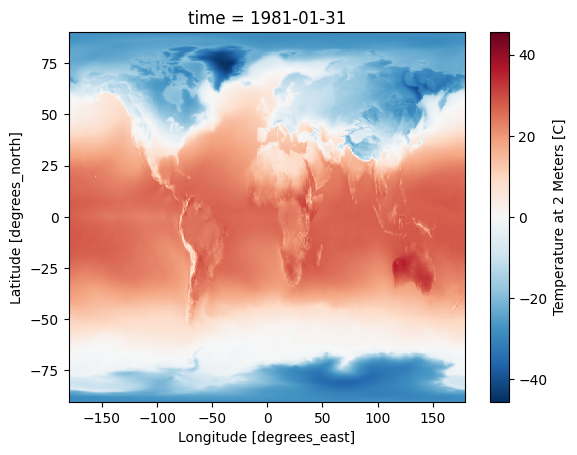

In [3]:
ds.T2M.isel(time=0).plot()

## Extracting Year-Specific Climate Data

This cell demonstrates how to extract data for a specific year (2020) from the full dataset.

<xarray.DataArray 'T2M' (time: 12, lat: 361, lon: 576)> Size: 10MB
dask.array<getitem, shape=(12, 361, 576), dtype=float32, chunksize=(12, 30, 30), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 96B 2020-01-31 2020-02-29 ... 2020-12-31
  * lat      (lat) float64 3kB -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * lon      (lon) float64 5kB -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
Attributes:
    base:                float32
    cell_methods:        time: mean
    definition:          The average air (dry bulb) temperature at 2 meters a...
    long_name:           Temperature at 2 Meters
    significant_digits:  2
    standard_name:       Temperature_at_2_Meters
    status:              official
    units:               C
    valid_max:           80.0
    valid_min:           -125.0


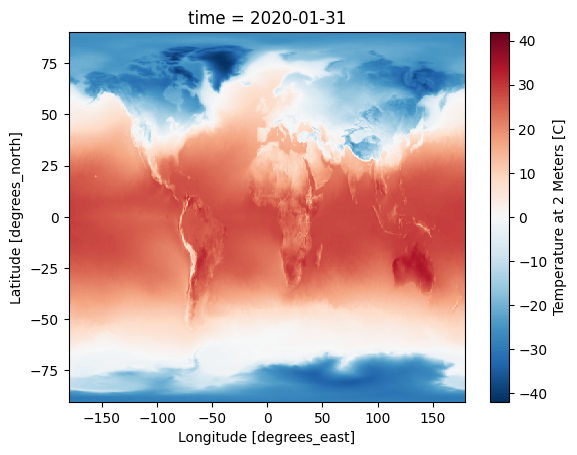

In [4]:
import xarray as xr

# Open the dataset
ds = xr.open_zarr(
    "https://nasa-power.s3.us-west-2.amazonaws.com/merra2/temporal/power_merra2_monthly_temporal_utc.zarr/"
)

# Choose the year
year = 2020

# Select only that year
ds_2020 = ds.sel(time=slice(f"{year}-01-01", f"{year}-12-31"))

# Now ds_2020['T2M'] has shape: (12, lat, lon)

print(ds_2020['T2M'])

# Optionally: save it to a new file
ds_2020[['T2M']].to_netcdf(f"T2M_monthly_{year}.nc")

# Plot first month
ds_2020['T2M'].isel(time=0).plot()

## GeoCroissant Converter

In [5]:
import json
from datetime import datetime
import xarray as xr
import hashlib


def create_nasa_t2m_2020_croissant():
    """Create GeoCroissant metadata for NASA T2M 2020 following TTL specifications."""
    
    zarr_url = "https://nasa-power.s3.us-west-2.amazonaws.com/merra2/temporal/power_merra2_monthly_temporal_utc.zarr/"
    
    # Load dataset
    ds_full = xr.open_zarr(zarr_url)
    ds_2020 = ds_full.sel(time=slice("2020-01-01", "2020-12-31"))
    
    # Generate checksum
    hash_input = f"{zarr_url}2020T2M".encode('utf-8')
    checksum = hashlib.sha256(hash_input).hexdigest()
    
    # TTL-compliant GeoCroissant metadata
    croissant = {
        "@context": {
            "@language": "en",
            "@vocab": "https://schema.org/",
            "citeAs": "cr:citeAs",
            "column": "cr:column",
            "conformsTo": "dct:conformsTo",
            "cr": "http://mlcommons.org/croissant/",
            "geocr": "http://mlcommons.org/croissant/geo/",
            "rai": "http://mlcommons.org/croissant/RAI/",
            "dct": "http://purl.org/dc/terms/",
            "sc": "https://schema.org/",
            "data": {
                "@id": "cr:data",
                "@type": "@json"
            },
            "examples": {
                "@id": "cr:examples",
                "@type": "@json"
            },
            "dataType": {
                "@id": "cr:dataType",
                "@type": "@vocab"
            },
            "extract": "cr:extract",
            "field": "cr:field",
            "fileProperty": "cr:fileProperty",
            "fileObject": "cr:fileObject",
            "fileSet": "cr:fileSet",
            "format": "cr:format",
            "includes": "cr:includes",
            "isLiveDataset": "cr:isLiveDataset",
            "jsonPath": "cr:jsonPath",
            "key": "cr:key",
            "md5": "cr:md5",
            "parentField": "cr:parentField",
            "path": "cr:path",
            "recordSet": "cr:recordSet",
            "references": "cr:references",
            "regex": "cr:regex",
            "repeated": "cr:repeated",
            "replace": "cr:replace",
            "samplingRate": "cr:samplingRate",
            "separator": "cr:separator",
            "source": "cr:source",
            "subField": "cr:subField",
            "transform": "cr:transform"
        },
        "@type": "sc:Dataset",
        "name": "NASA POWER T2M 2020",
        "description": "Temperature at 2 Meters monthly data for 2020",
        "version": "1.0.0",
        "license": "CC-BY-4.0",
        "conformsTo": [
            "http://mlcommons.org/croissant/1.1",
            "http://mlcommons.org/croissant/geo/1.0"
        ],
        "citeAs": "@dataset{nasa_power_t2m_2020, title={NASA POWER T2M 2020}, year={2020}, url={https://nasa-power.s3.us-west-2.amazonaws.com}}",
        "datePublished": "2020-01-01",
        
        # Standard spatial coverage using schema.org
        "spatialCoverage": {
            "@type": "Place",
            "geo": {
                "@type": "GeoShape",
                "box": "-90.0 -180.0 90.0 179.375"
            }
        },
        
        # GeoCroissant spatial properties
        "geocr:coordinateReferenceSystem": "EPSG:4326",
        "geocr:spatialResolution": {
            "@type": "QuantitativeValue",
            "value": 0.5,
            "unitText": "degrees"
        },
        "geocr:temporalResolution": {
            "@type": "QuantitativeValue", 
            "value": 1,
            "unitText": "month"
        },
        
        # Temporal coverage
        "temporalCoverage": "2020-01-01/2020-12-31",
        
        "keywords": ["temperature", "climate", "nasa power", "t2m", "2020"],
        
        "distribution": [
            {
                "@type": "cr:FileObject",
                "@id": "zarr-data",
                "name": "zarr-data",
                "contentUrl": zarr_url,
                "encodingFormat": "application/zarr",
                "md5": checksum[:32]
            }
        ],
        
        "recordSet": [
            {
                "@type": "cr:RecordSet",
                "name": "t2m_data",
                "field": [
                    {
                        "@type": "cr:Field",
                        "name": "T2M",
                        "description": "Temperature at 2 Meters",
                        "dataType": "sc:Float",
                        "source": {
                            "fileObject": {
                                "@id": "zarr-data"
                            }
                        }
                    },
                    {
                        "@type": "cr:Field", 
                        "name": "latitude",
                        "description": "Latitude coordinate",
                        "dataType": "sc:Float",
                        "source": {
                            "fileObject": {
                                "@id": "zarr-data"
                            }
                        }
                    },
                    {
                        "@type": "cr:Field",
                        "name": "longitude",
                        "description": "Longitude coordinate", 
                        "dataType": "sc:Float",
                        "source": {
                            "fileObject": {
                                "@id": "zarr-data"
                            }
                        }
                    },
                    {
                        "@type": "cr:Field",
                        "name": "time",
                        "description": "Time coordinate",
                        "dataType": "sc:Text",
                        "source": {
                            "fileObject": {
                                "@id": "zarr-data"
                            }
                        }
                    }
                ]
            }
        ]
    }
    
    # Save metadata
    with open("NASA_T2M_2020_croissant.json", "w") as f:
        json.dump(croissant, f, indent=2)
    
    return croissant


# Execute
croissant = create_nasa_t2m_2020_croissant()

In [6]:
import json

# Read and print the metadata
with open('NASA_T2M_2020_croissant.json', 'r') as f:
    metadata = json.load(f)

# Pretty print the metadata
print(json.dumps(metadata, indent=2))

{
  "@context": {
    "@language": "en",
    "@vocab": "https://schema.org/",
    "citeAs": "cr:citeAs",
    "column": "cr:column",
    "conformsTo": "dct:conformsTo",
    "cr": "http://mlcommons.org/croissant/",
    "geocr": "http://mlcommons.org/croissant/geo/",
    "rai": "http://mlcommons.org/croissant/RAI/",
    "dct": "http://purl.org/dc/terms/",
    "sc": "https://schema.org/",
    "data": {
      "@id": "cr:data",
      "@type": "@json"
    },
    "examples": {
      "@id": "cr:examples",
      "@type": "@json"
    },
    "dataType": {
      "@id": "cr:dataType",
      "@type": "@vocab"
    },
    "extract": "cr:extract",
    "field": "cr:field",
    "fileProperty": "cr:fileProperty",
    "fileObject": "cr:fileObject",
    "fileSet": "cr:fileSet",
    "format": "cr:format",
    "includes": "cr:includes",
    "isLiveDataset": "cr:isLiveDataset",
    "jsonPath": "cr:jsonPath",
    "key": "cr:key",
    "md5": "cr:md5",
    "parentField": "cr:parentField",
    "path": "cr:path",
  

## Validating GeoCroissant Metadata

In [7]:
!mlcroissant validate --jsonld=NASA_T2M_2020_croissant.json

I0216 16:17:15.178573 139469204784960 validate.py:53] Done.


## Temperature Data Visualization
 Single Month Temperature Plot


Loading data for month 1...


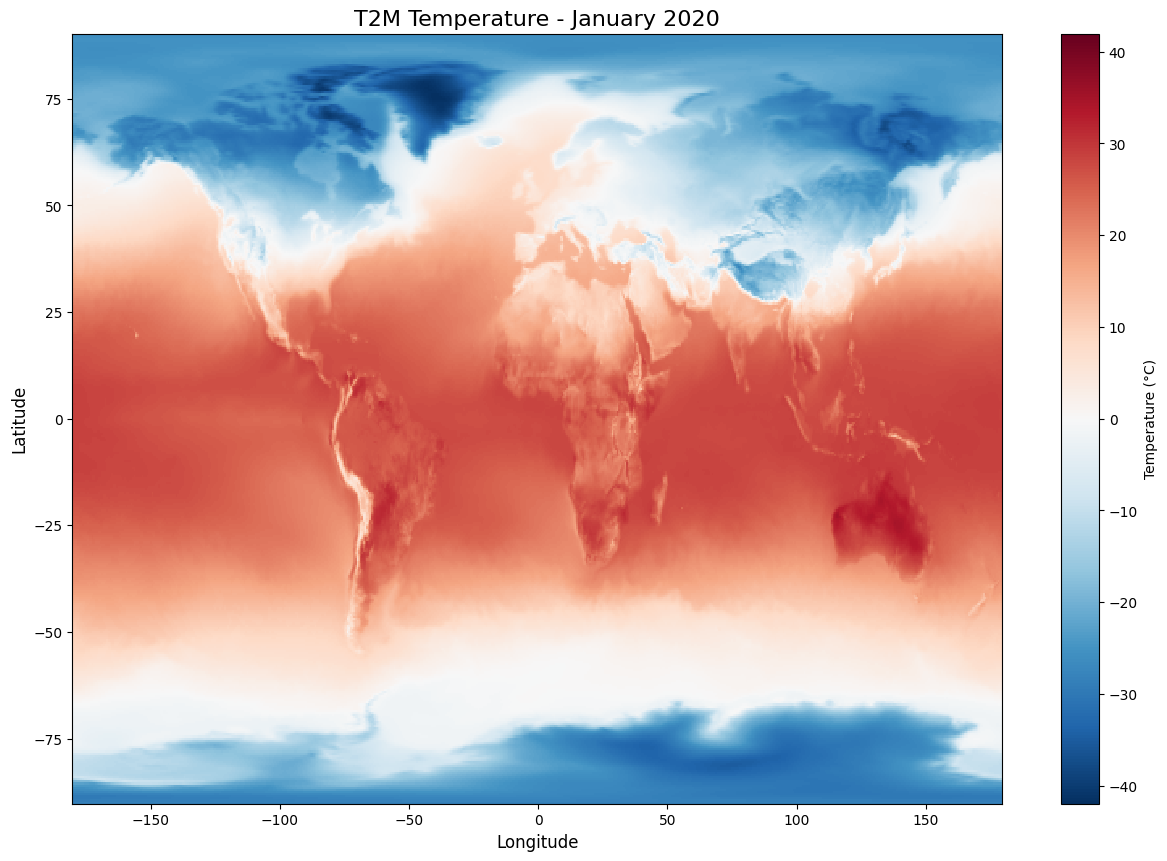


January Statistics:
  Mean: 4.21°C
  Min: -41.95°C
  Max: 35.23°C
  Std: 19.88°C


In [8]:
import json
import xarray as xr
import matplotlib.pyplot as plt


def plot_temperature(metadata_file: str = "NASA_T2M_2020_croissant.json", month: int = 1):
    """Plot temperature for a specific month using croissant metadata."""
    
    # Load metadata
    with open(metadata_file, 'r', encoding='utf-8') as f:
        metadata = json.load(f)
    
    # Get Zarr URL
    zarr_url = None
    for dist in metadata.get('distribution', []):
        if dist.get('encodingFormat') == 'application/zarr':
            zarr_url = dist.get('contentUrl', '')
            break
    
    if not zarr_url:
        raise ValueError("No Zarr URL found in metadata")
    
    # Load data
    print(f"Loading data for month {month}...")
    ds_full = xr.open_zarr(zarr_url)
    ds_2020 = ds_full.sel(time=slice("2020-01-01", "2020-12-31"))
    month_data = ds_2020['T2M'].isel(time=month-1)
    
    # Get month metadata
    month_names = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']
    
    # Create plot
    plt.figure(figsize=(15, 10))
    
    # Plot temperature map
    month_data.plot(
        cmap='RdBu_r', 
        cbar_kwargs={'label': 'Temperature (°C)'}
    )
    
    # Add title and labels
    plt.title(f'T2M Temperature - {month_names[month-1]} 2020', fontsize=16)
    plt.xlabel('Longitude', fontsize=12)
    plt.ylabel('Latitude', fontsize=12)
    
    plt.show()
    
    # Print statistics
    print(f"\n{month_names[month-1]} Statistics:")
    print(f"  Mean: {float(month_data.mean()):.2f}°C")
    print(f"  Min: {float(month_data.min()):.2f}°C")
    print(f"  Max: {float(month_data.max()):.2f}°C")
    print(f"  Std: {float(month_data.std()):.2f}°C")


# Usage
if __name__ == "__main__":
    plot_temperature(month=1)

### All Months Temperature Plot
This cell creates a comprehensive visualization showing temperature patterns across all 12 months of 2020.

Loading data for all months...


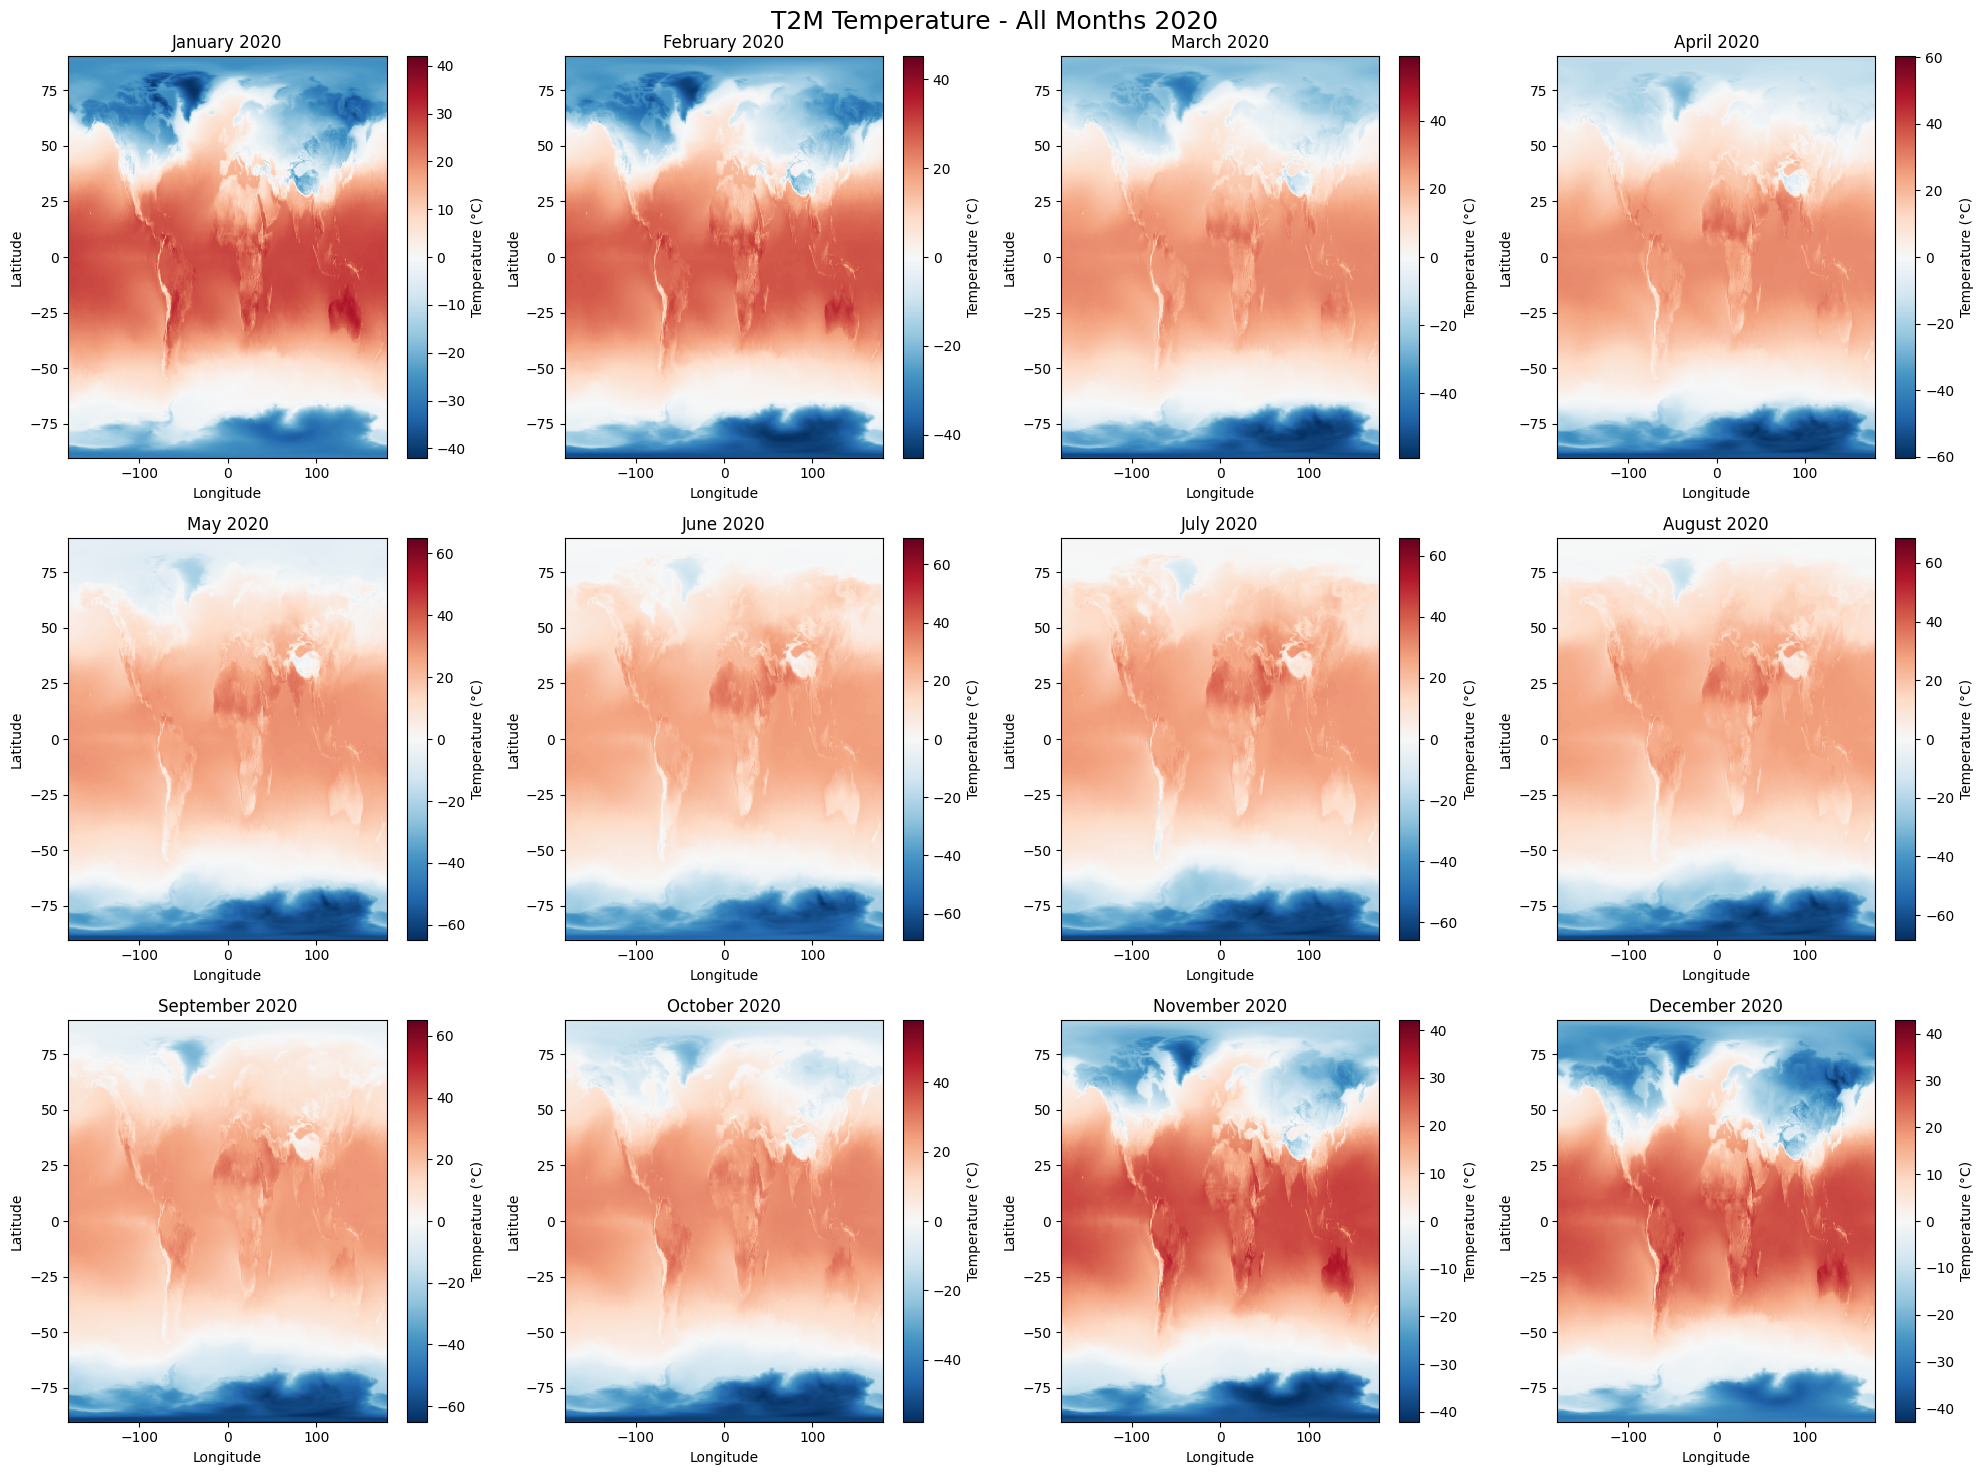

In [9]:
import json
import xarray as xr
import matplotlib.pyplot as plt


def plot_all_months(metadata_file: str = "NASA_T2M_2020_croissant.json"):
    """Plot temperature for all 12 months using croissant metadata."""
    
    # Load metadata
    with open(metadata_file, 'r', encoding='utf-8') as f:
        metadata = json.load(f)
    
    # Get Zarr URL
    zarr_url = None
    for dist in metadata.get('distribution', []):
        if dist.get('encodingFormat') == 'application/zarr':
            zarr_url = dist.get('contentUrl', '')
            break
    
    if not zarr_url:
        raise ValueError("No Zarr URL found in metadata")
    
    # Load data
    print(f"Loading data for all months...")
    ds_full = xr.open_zarr(zarr_url)
    ds_2020 = ds_full.sel(time=slice("2020-01-01", "2020-12-31"))
    
    # Get month names
    month_names = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']
    
    # Create subplots for all 12 months
    fig, axes = plt.subplots(3, 4, figsize=(20, 15))
    axes = axes.flatten()
    
    # Plot each month
    for month in range(12):
        month_data = ds_2020['T2M'].isel(time=month)
        
        # Plot temperature map
        month_data.plot(
            ax=axes[month],
            cmap='RdBu_r', 
            cbar_kwargs={'label': 'Temperature (°C)'}
        )
        
        # Add title
        axes[month].set_title(f'{month_names[month]} 2020', fontsize=12)
        axes[month].set_xlabel('Longitude')
        axes[month].set_ylabel('Latitude')
    
    # Add overall title
    plt.suptitle('T2M Temperature - All Months 2020', fontsize=18)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()


# Usage
if __name__ == "__main__":
    plot_all_months()